In [36]:
import neptune.new as neptune
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [37]:
def get_metric_matrix(x_values, x_name, y_values, y_name, df, metric_name):
    result = np.zeros( (len(x_values), len(y_values)) )

    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            index_x = df[x_name] == x
            index_y = df[y_name] == y
            metric = df.loc[index_x & index_y][metric_name].to_numpy()[0]
            result[i,j] = metric

    return result

In [68]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center",
              size=8)
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def make_plot(data, name, x_labels, x_name, y_labels, y_name):
    fig, ax = plt.subplots()

    im, cbar = heatmap(data, x_labels, y_labels, ax=ax,
                       cmap="YlGn", cbarlabel="name")
    texts = annotate_heatmap(im, valfmt="{x:.3f}")

    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(name)
    fig.tight_layout()
    plt.savefig(name, dpi=300, facecolor='white', transparent=False)

In [39]:
project_name = 'PESC-ATIS/FairnessDebug'

project = neptune.get_project(
    name=project_name,
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1ZGUxY2IwMy1kOTMzLTRjMTUtYjAxYy01MWE2MmMyYzQ0ZmYifQ==')

In [40]:
df = project.fetch_runs_table(tag='running_ok').to_pandas()
df.to_csv('2021-08-24.csv')
df.head()

,sys/creation_time,sys/description,sys/failed,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,sys/ping_time,...,parameters/hyperparameters/num_layers,parameters/num-classes,parameters/num-features,source_code/git,source_code/integrations/neptune-tensorflow-keras,monitoring/cpu,monitoring/gpu,monitoring/gpu_memory,monitoring/memory,monitoring/stdout
0,2021-08-24 01:46:10.819000+00:00,,False,meriadoc,FAIRDEB-357,2021-08-24 01:46:26.347000+00:00,614,arbitrary_correction_batch,ygorcanalli,2021-08-24 01:46:26.347000+00:00,...,3,2,108,d7b28bc994f1b8fad5ee955b223730e9a4a27fcb,0+untagged.72.gd7b28bc.dirty,22.9,NaN,NaN,10.215092,"Shutting down background jobs, please wait a m..."
1,2021-08-24 01:45:52.173000+00:00,,False,meriadoc,FAIRDEB-356,2021-08-24 01:46:07.844000+00:00,615,arbitrary_correction_batch,ygorcanalli,2021-08-24 01:46:07.844000+00:00,...,3,2,108,d7b28bc994f1b8fad5ee955b223730e9a4a27fcb,0+untagged.72.gd7b28bc.dirty,21.9,NaN,NaN,10.114250,"Shutting down background jobs, please wait a m..."
2,2021-08-24 01:45:34.090000+00:00,,False,meriadoc,FAIRDEB-355,2021-08-24 01:45:49.487000+00:00,614,arbitrary_correction_batch,ygorcanalli,2021-08-24 01:45:49.487000+00:00,...,3,2,108,d7b28bc994f1b8fad5ee955b223730e9a4a27fcb,0+untagged.72.gd7b28bc.dirty,9.1,NaN,NaN,10.038315,"Shutting down background jobs, please wait a m..."
3,2021-08-24 01:33:58.185000+00:00,,False,meriadoc,FAIRDEB-354,2021-08-24 01:34:13.527000+00:00,614,arbitrary_correction_batch,ygorcanalli,2021-08-24 01:34:13.527000+00:00,...,3,2,108,d7b28bc994f1b8fad5ee955b223730e9a4a27fcb,0+untagged.72.gd7b28bc.dirty,19.1,NaN,NaN,10.905571,"Shutting down background jobs, please wait a m..."
4,2021-08-24 01:33:33.366000+00:00,,False,meriadoc,FAIRDEB-353,2021-08-24 01:33:54.320000+00:00,620,arbitrary_correction_batch,ygorcanalli,2021-08-24 01:33:54.320000+00:00,...,3,2,108,d7b28bc994f1b8fad5ee955b223730e9a4a27fcb,0+untagged.72.gd7b28bc.dirty,20.2,NaN,NaN,10.828667,"Shutting down background jobs, please wait a m..."


In [41]:
for c in df.columns:
    print(c)

sys/creation_time
sys/description
sys/failed
sys/hostname
sys/id
sys/modification_time
sys/monitoring_time
sys/name
sys/owner
sys/ping_time
sys/running_time
sys/size
sys/state
sys/tags
metrics/ACC_balance
metrics/ACC_overall
metrics/ACC_protected
metrics/ACC_relative_balance
metrics/ACC_unprotected
metrics/FDR_balance
metrics/FDR_overall
metrics/FDR_protected
metrics/FDR_relative_balance
metrics/FDR_unprotected
metrics/FNR_balance
metrics/FNR_overall
metrics/FNR_protected
metrics/FNR_relative_balance
metrics/FNR_unprotected
metrics/FOR_balance
metrics/FOR_overall
metrics/FOR_protected
metrics/FOR_relative_balance
metrics/FOR_unprotected
metrics/FPR_balance
metrics/FPR_overall
metrics/FPR_protected
metrics/FPR_relative_balance
metrics/FPR_unprotected
metrics/MCC_balance
metrics/MCC_overall
metrics/MCC_protected
metrics/MCC_relative_balance
metrics/MCC_unprotected
metrics/NPV_balance
metrics/NPV_overall
metrics/NPV_protected
metrics/NPV_relative_balance
metrics/NPV_unprotected
metrics/Ne

In [42]:
protected_promotion = np.sort(df['model/params/protected-promotion'].unique()).tolist()
unprotected_demotion = np.sort(df['model/params/unprotected-demotion'].unique()).tolist()


In [70]:
metrics = ['metrics/ACC_balance',
'metrics/ACC_overall',
'metrics/ACC_relative_balance',
'metrics/FDR_balance',
'metrics/FDR_overall',
'metrics/FDR_relative_balance',
'metrics/FNR_balance',
'metrics/FNR_overall',
'metrics/FNR_relative_balance',
'metrics/FOR_balance',
'metrics/FOR_overall',
'metrics/FOR_relative_balance',
'metrics/FPR_balance',
'metrics/FPR_overall',
'metrics/FPR_relative_balance',
'metrics/MCC_balance',
'metrics/MCC_overall',
'metrics/MCC_relative_balance',
'metrics/NPV_balance',
'metrics/NPV_overall',
'metrics/NPV_relative_balance',
'metrics/Negatives_balance',
'metrics/Negatives_overall',
'metrics/Negatives_relative_balance',
'metrics/PPV_balance',
'metrics/PPV_overall',
'metrics/PPV_relative_balance',
'metrics/Positives_balance',
'metrics/Positives_overall',
'metrics/Positives_relative_balance',
'metrics/TNR_balance',
'metrics/TNR_overall',
'metrics/TNR_relative_balance',
'metrics/TPR_balance',
'metrics/TPR_overall',
'metrics/TPR_relative_balance']

<ipython-input-68-671af8636aaf>:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


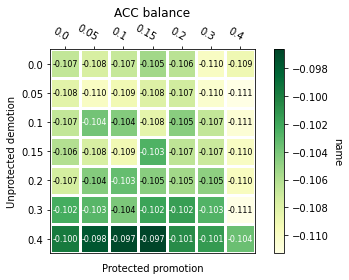

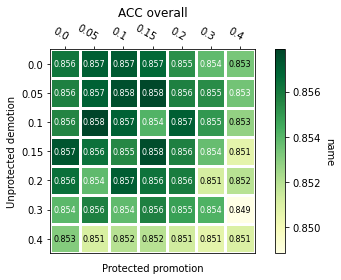

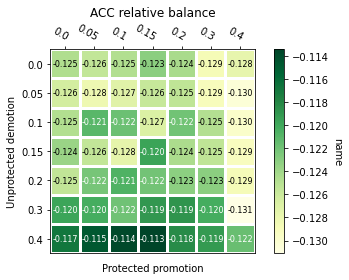

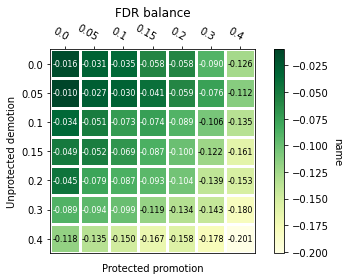

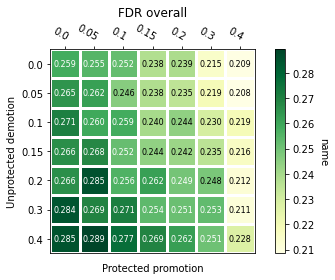

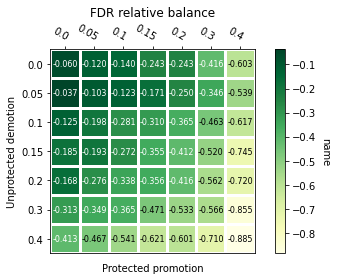

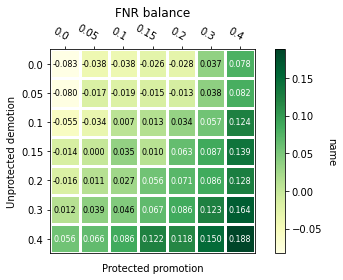

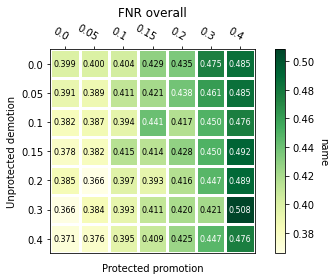

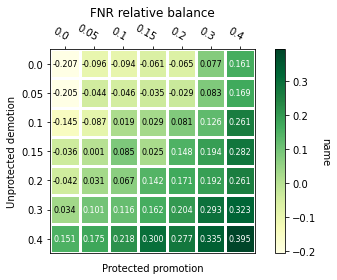

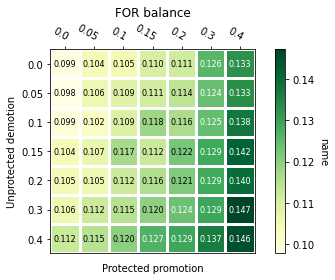

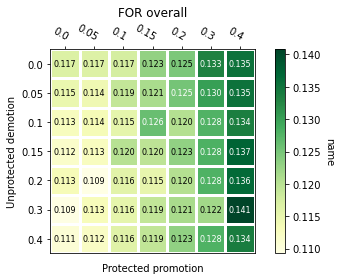

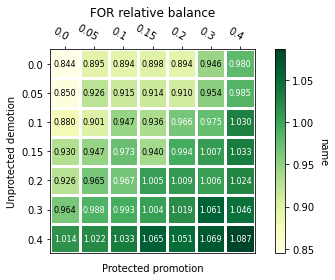

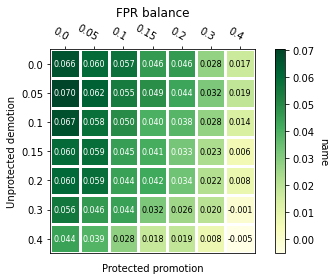

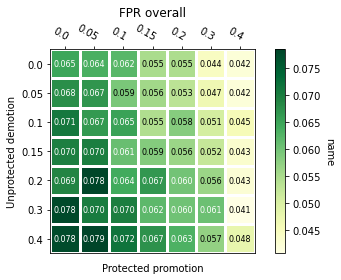

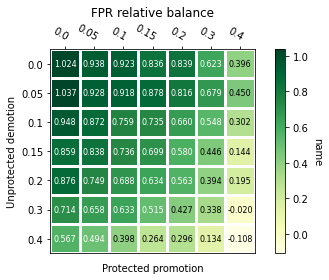

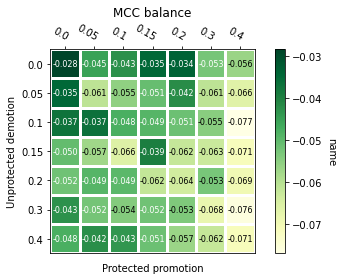

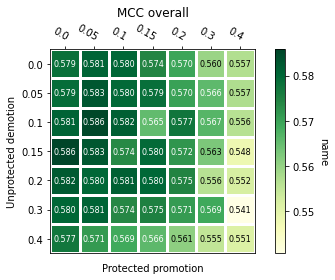

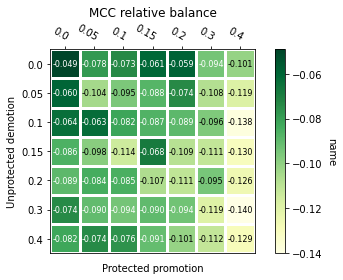

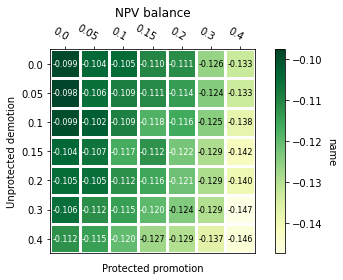

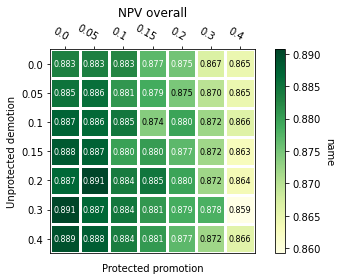

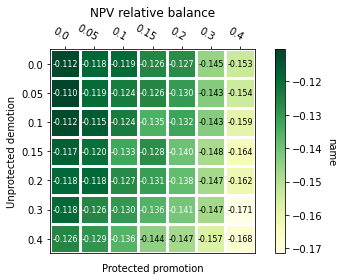

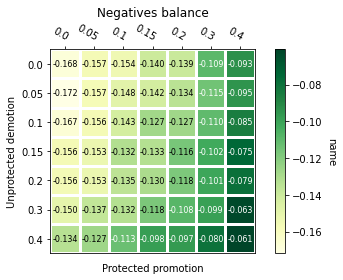

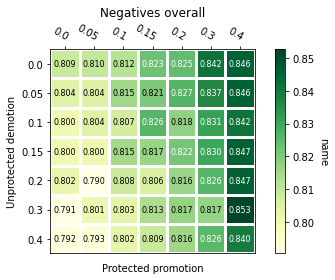

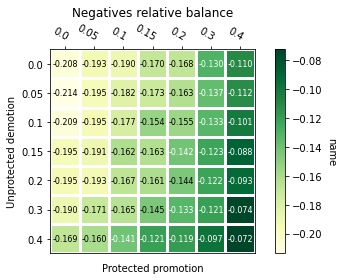

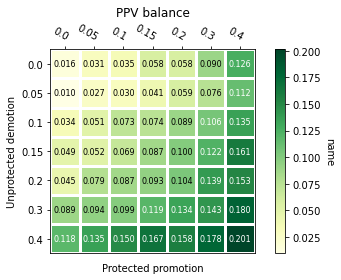

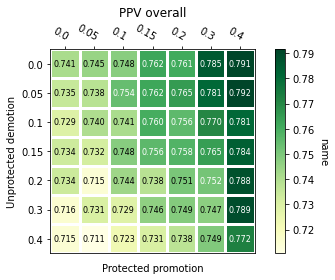

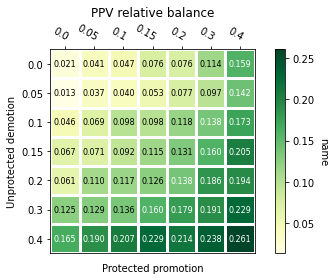

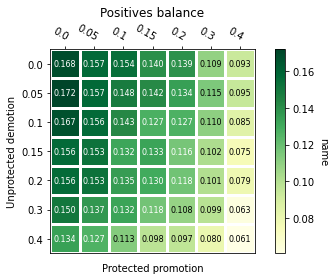

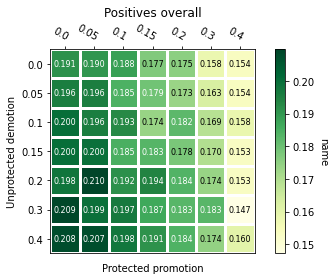

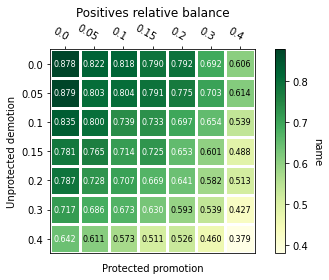

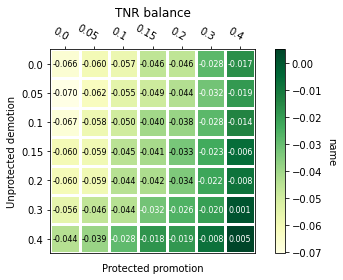

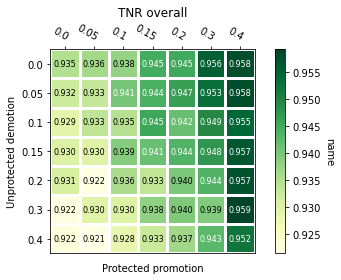

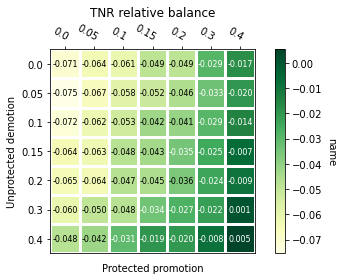

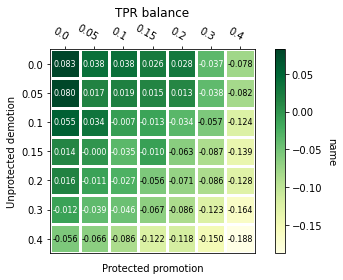

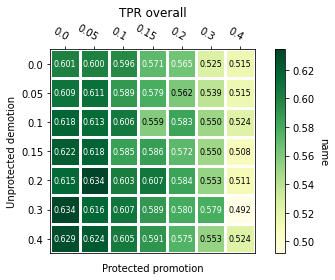

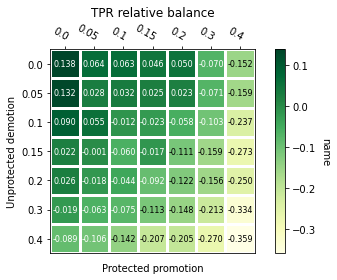

In [72]:
for metric_name in metrics:
    data = get_metric_matrix(protected_promotion, 'model/params/protected-promotion',
                  unprotected_demotion, 'model/params/unprotected-demotion',
                  df, metric_name)
    metric_name = metric_name.replace('metrics/', '')
    metric_name = metric_name.replace('_', ' ')
    make_plot(data, metric_name, protected_promotion, 'Protected promotion',
              unprotected_demotion, 'Unprotected demotion')